In [15]:
import torch
from segment_anything import sam_model_registry
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import evaluation

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_b"

sam = sam_model_registry[MODEL_TYPE](checkpoint=r"C:\\Users\\onurb\\master\\computer_vision\\projet\\CSC_51073_EP-Project\\CSC_51073_EP-Project\\sam_vit_b_01ec64.pth")
sam.to(device=DEVICE)

c:\Users\onurb\anaconda3\envs\cuda\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


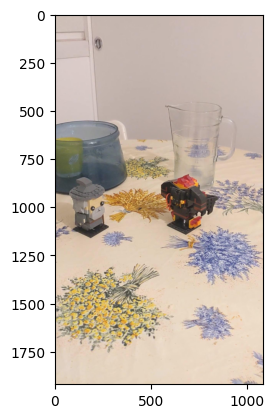

In [2]:
img_path = "..\\Image_Segmentation\\labels\\0001_3\\img.png"
image = Image.open(img_path)
plt.imshow(image)

In [7]:
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

image = Image.open(img_path)
image = np.array(image)
result = mask_generator.generate(image)

[[False False False ...  True False False]
 [False False False ...  True False False]
 [False False False ...  True False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


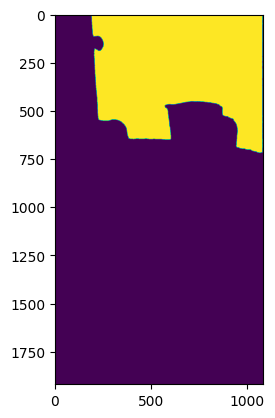

In [ ]:
print(result[0]['segmentation'])
plt.imshow(result[0]['segmentation'].astype(int))

generate masks

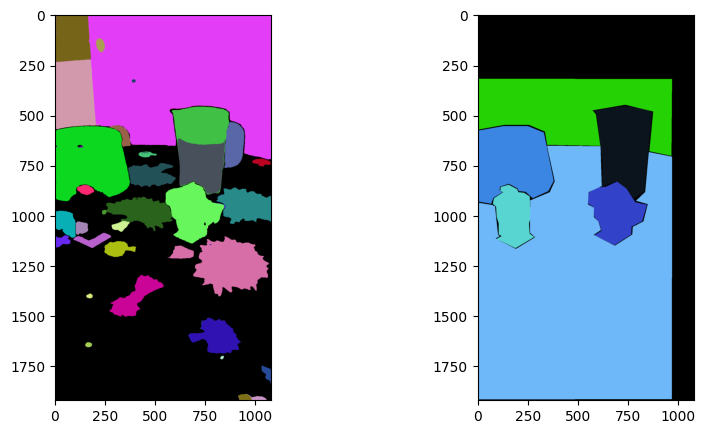

In [18]:
#generate prediction masks
nb_masks = len(result)
masks = [result[i]['segmentation'] for i in range(nb_masks)]

segmentation_map_pred = evaluation.generate_segmentation_map(masks)

label_png = "..\\Image_Segmentation\\labels\\0001_3\\label.png" #this is generated by lableme

lbl = np.asarray(Image.open(label_png))
nb_labels = np.max(np.unique(lbl))
gt_masks = [np.where(lbl == i, 1, 0) for i in range(1,nb_labels+1)]

segmentation_map_gt = evaluation.generate_segmentation_map(gt_masks)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
ax[0].imshow(segmentation_map_pred)
ax[1].imshow(segmentation_map_gt)

In [19]:
#evaluate the model
ious = evaluation.get_ious_from_masks(masks, gt_masks)

for i in range(len(ious)):
    print(f"the max ious of mask {i} is: {ious[i][1]} with iou = {ious[i][0]}")

the max ious of mask 0 is: 5 with iou = 0.30612136058678596
the max ious of mask 1 is: 0 with iou = 0
the max ious of mask 2 is: 5 with iou = 0.1649887243589954
the max ious of mask 3 is: 2 with iou = 0.02786773452402937
the max ious of mask 4 is: 4 with iou = 0.2070934957596045
the max ious of mask 5 is: 0 with iou = 0
the max ious of mask 6 is: 3 with iou = 0.9688819486536743
the max ious of mask 7 is: 2 with iou = 0.02023747031105455
the max ious of mask 8 is: 0 with iou = 0
the max ious of mask 9 is: 2 with iou = 0.03637068687237464
the max ious of mask 10 is: 2 with iou = 0.001804407955076535
the max ious of mask 11 is: 2 with iou = 0.020334518662750406
the max ious of mask 12 is: 2 with iou = 0.02065081478921205
the max ious of mask 13 is: 0 with iou = 0.13163285981224251
the max ious of mask 14 is: 0 with iou = 0
the max ious of mask 15 is: 4 with iou = 0.22433624118799236
the max ious of mask 16 is: 2 with iou = 0.008350416231211822
the max ious of mask 17 is: 5 with iou = 0.35

In [ ]:
#plot the 4 maximum ious
ax[0,0].imshow(masks[6])
ax[0,1].imshow(gt_masks[3])

ax[1,0].imshow(masks[30])
ax[1,1].imshow(gt_masks[4])

ax[2,0].imshow(masks[43])
ax[2,1].imshow(gt_masks[1])

ax[3,0].imshow(masks[39])
ax[3,1].imshow(gt_masks[3])